In [1]:
import tensorflow

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
!pip install split-folders

In [4]:
import splitfolders

In [5]:
input_file=r"C:\Users\DELL\Downloads\dataset"
output_file=r"C:\Users\DELL\Downloads\dataset splitted"

In [6]:
splitfolders.ratio(input_file, output=output_file, seed=38, ratio=(.75, .25), group_prefix=None)

Copying files: 142 files [00:00, 155.52 files/s]


In [7]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory(r"C:\Users\DELL\Downloads\dataset splitted\train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,  
                                                 class_mode = 'binary')

Found 106 images belonging to 2 classes.


In [67]:
test_set = test_datagen.flow_from_directory(r"C:\Users\DELL\Downloads\dataset splitted\val",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 36 images belonging to 2 classes.


In [32]:
history=classifier.fit(training_set,
                         steps_per_epoch = 80,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 80)

Epoch 1/5
 3/80 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8809 - loss: 0.2958   

C:\Users\DELL\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8775 - loss: 0.3030 - val_accuracy: 0.8889 - val_loss: 0.3073
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8772 - loss: 0.2636 - val_accuracy: 0.8611 - val_loss: 0.3006
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9432 - loss: 0.1830 - val_accuracy: 0.8889 - val_loss: 0.3175
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9616 - loss: 0.1438 - val_accuracy: 0.7778 - val_loss: 0.4569
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9336 - loss: 0.1597 - val_accuracy: 0.9167 - val_loss: 0.3156


   accuracy      loss  val_accuracy  val_loss
0  0.877358  0.303290      0.888889  0.307299
1  0.877358  0.262980      0.861111  0.300640
2  0.943396  0.182409      0.888889  0.317478
3  0.962264  0.142925      0.777778  0.456856
4  0.933962  0.159851      0.916667  0.315578


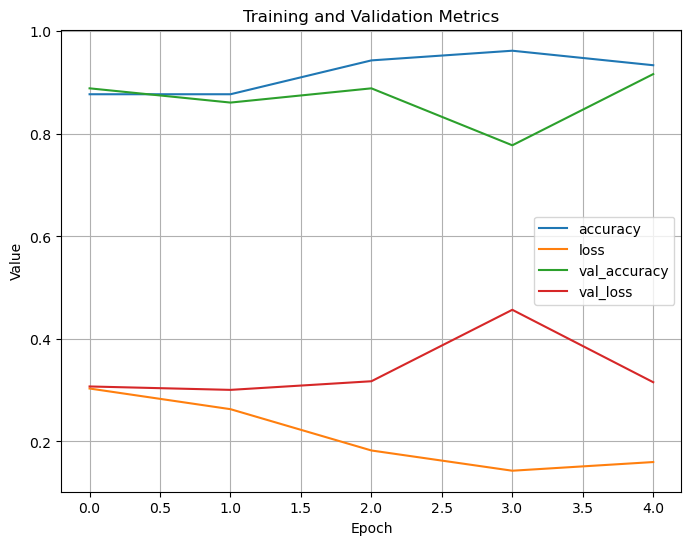

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history of your model
metrics_df = pd.DataFrame(history.history)

# Inspect the first few rows of the DataFrame
print(metrics_df.head())

# Ensure all columns contain numeric data
metrics_df = metrics_df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values (if necessary)
metrics_df = metrics_df.dropna()

# Plot the DataFrame
metrics_df.plot(figsize=(8, 6))
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [24]:
import numpy as np
from keras.preprocessing import image
test_image = \
    image.load_img(r"C:\Users\DELL\Downloads\dataset splitted\val\starfish\image_0040.jpg"
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [25]:
print (result)

[[0.]]


In [55]:
test_image1 = \
    image.load_img(r"C:\Users\DELL\Downloads\dataset splitted\val\starfish\image_0054.jpg"
                   , target_size=(64, 64))
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis=0)
result1 = classifier.predict(test_image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [56]:
print(result1)

[[0.]]


In [39]:
test_image2 = \
    image.load_img(r"C:\Users\DELL\Downloads\dataset splitted\val\starfish\image_0043.jpg"
                   , target_size=(64, 64))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)
result2 = classifier.predict(test_image2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [40]:
print(result2)

[[0.]]


In [59]:
test_image3 = \
    image.load_img(r"C:\Users\DELL\Downloads\dataset splitted\val\windsor_chair\image_0053.jpg"
                   , target_size=(64, 64))
test_image3 = image.img_to_array(test_image3)
test_image3 = np.expand_dims(test_image3, axis=0)
result3 = classifier.predict(test_image3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [60]:
print(result3)

[[1.]]


In [61]:
test_image4 = \
    image.load_img(r"C:\Users\DELL\Downloads\dataset splitted\val\windsor_chair\image_0030.jpg"
                   , target_size=(64, 64))
test_image4 = image.img_to_array(test_image4)
test_image4 = np.expand_dims(test_image4, axis=0)
result4= classifier.predict(test_image4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [62]:
print(result4)

[[1.]]


In [65]:
import os
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load the model (uncomment if necessary)
# classifier = load_model('path_to_your_model.h5')

# Assuming you have a list of image paths
image_folder = r"C:\Users\DELL\Downloads\dataset splitted\val\windsor_chair"
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder)]

# Assuming you have access to the class indices
class_indices = training_set.class_indices  # Assuming 'training_set' is your training data generator
class_names = list(class_indices.keys())

image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.gif'}

# Loop through each image path
for img_path in image_paths:
    # Load and preprocess the image
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make a prediction
    result = classifier.predict(test_image)
    
    # Interpret the result
    predicted_class = [np.argmax(result)]
    
    # Print the result
    print(f"Image: {os.path.basename(img_path)} - Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: image_0003.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: image_0005.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: image_0007.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: image_0024.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: image_0027.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: image_0028.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: image_0030.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: image_0039.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image: image_0041.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: image_0043.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: image_0045.jpg - Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image: image_0047.jpg - Predicted class: [0]
1/1 